In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def plot_experiments(experiments):
    fields_to_plot = ["loss", "mae", "mean_q", "episode_reward", "nb_episode_steps", "duration"]
    num_experiments = len(experiments)
    
    # Paleta de colores más visual para pocos experimentos
    color_map = plt.get_cmap("tab10")
    colors = [color_map(i % 10) for i in range(num_experiments)]
    
    # Cargar y convertir a DataFrame
    dfs = {}
    for i, (name, path) in enumerate(experiments.items()):
        with open(path, 'r') as f:
            content = json.load(f)
            dfs[name] = pd.DataFrame(content)
    
    # Crear los subplots
    fig, axs = plt.subplots(3, 2, figsize=(16, 18))
    axs = axs.flatten()  # Convertir a lista para indexación más sencilla
    
    for i, field in enumerate(fields_to_plot):
        ax = axs[i]
        for j, (name, df) in enumerate(dfs.items()):
            if field in df.columns:
                ax.plot(df[field], label=name, color=colors[j])
            else:
                print(f"Advertencia: el campo '{field}' no está en el experimento '{name}'.")
        
        ax.set_title(field, fontsize=14)
        ax.set_xlabel("Episodes")
        ax.set_ylabel(field)
        ax.grid(True)
        ax.legend()
    
    plt.tight_layout()
    plt.show()


In [3]:
experimentos = {
    "Experimento_1": "./Experimento_1/modelos/dqn_SpaceInvaders-v0_log.json"
    }

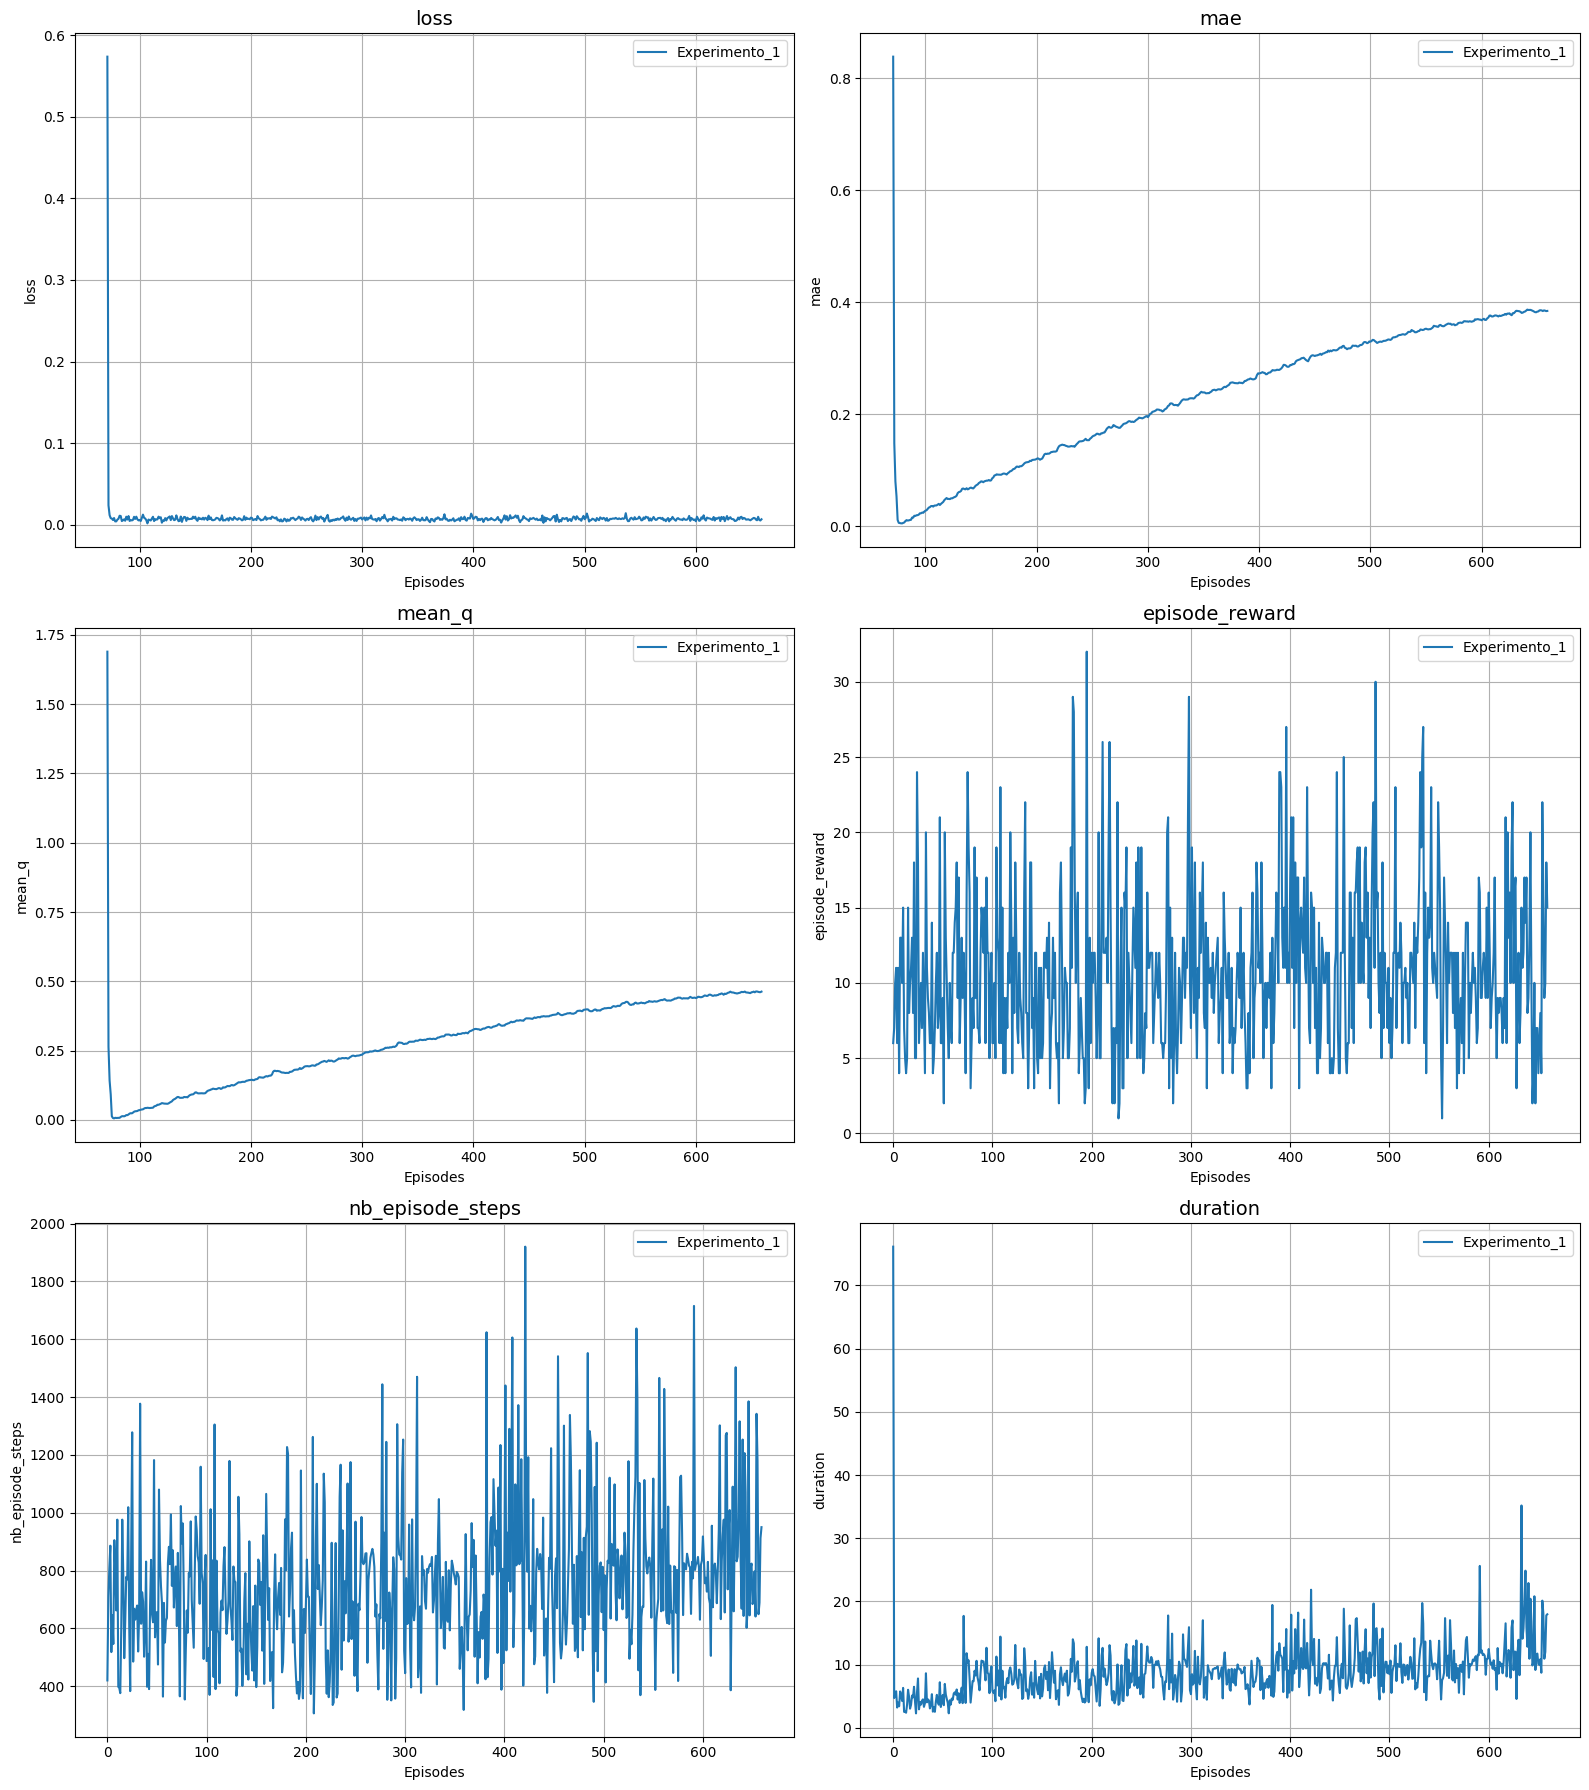

In [6]:
plot_experiments(experimentos)